In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import joblib
import first_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_71556\2466237156.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def grid_search_knn(X_train, y_train, X_val, y_val, num_neighbors_list, distance_metrics_list, num_folds=10):
    param_grid = {
        'n_neighbors': num_neighbors_list,
        'metric': distance_metrics_list
    }
    
    knn = KNeighborsRegressor()
    
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=num_folds, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    results = []
    for i in range(len(grid_search.cv_results_['params'])):
        params = grid_search.cv_results_['params'][i]
        knn = KNeighborsRegressor(**params)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_val)
        
        mae_val = mean_absolute_error(y_val, predictions)
        mse_val = mean_squared_error(y_val, predictions)

        results.append((params['n_neighbors'], params['metric'], mae_val, mse_val))
    
    best_model = grid_search.best_estimator_
    
    predizioni_val = best_model.predict(X_val)
    
    mse_val = mean_squared_error(y_val, predizioni_val)
    mae_val = mean_absolute_error(y_val, predizioni_val)
    r2_val = r2_score(y_val, predizioni_val)
    mape_val = mean_absolute_percentage_error(y_val, predizioni_val)
    
    return best_model, grid_search.best_params_, mse_val, mae_val, r2_val, mape_val, results


In [3]:
# # PCA train-test
# X_train = np.load("./Datasets/Train_Test/PCA/principals_components_train.npy")
# X_test = np.load("./Datasets/Train_Test/PCA/principals_components_test.npy")
# y_train, y_test = first_analysis.load_df("./Datasets/Train_Test/y_train.csv", "./Datasets/Train_Test/y_test.csv")

In [4]:
# PCA train-test no outliers
X_train = np.load("./Datasets/Train_Test/PCA/no_outliers/principals_components_train.npy")
X_test = np.load("./Datasets/Train_Test/PCA/no_outliers/principals_components_test.npy")
y_train, y_test = first_analysis.load_df("./Datasets/Train_Test/y_train.csv", "./Datasets/Train_Test/y_test.csv")

In [5]:
# # Scaled train-test
# X_train = np.load("./Datasets/Train_Test/Scaled/X_train_scaled.npy")
# X_test = np.load("./Datasets/Train_Test/Scaled/X_test_scaled.npy")
# y_train, y_test = first_analysis.load_df("./Datasets/Train_Test/y_train.csv", "./Datasets/Train_Test/y_test.csv")

In [6]:
# # Scaled train-test no outliers
# X_train = np.load("./Datasets/Train_Test/Scaled/no_outliers/X_train_scaled.npy")
# X_test = np.load("./Datasets/Train_Test/Scaled/no_outliers/X_test_scaled.npy")
# y_train, y_test = first_analysis.load_df("./Datasets/Train_Test/y_train.csv", "./Datasets/Train_Test/y_test.csv")

In [7]:
num_neighbors_list = list(range(1, 41))
distance_metrics_list = ['euclidean', 'manhattan']

best_model, best_params, mse_val, mae_val, r2_val, mape_val, results_plt = grid_search_knn(X_train, y_train, X_test, y_test, num_neighbors_list, distance_metrics_list)

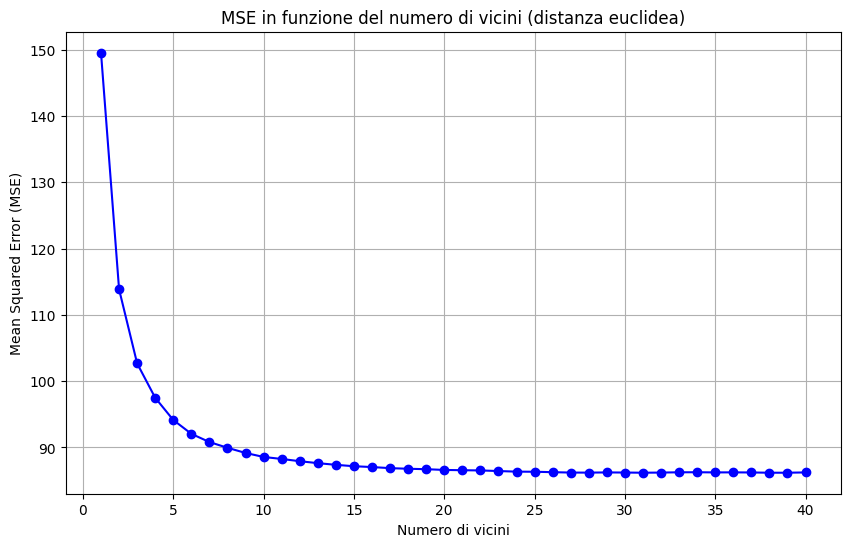

In [8]:
# Filtra i risultati per distanza euclidea
euclidean_results = [(n, mse) for n, m, mae, mse in results_plt if m == 'euclidean']
neighbors = [item[0] for item in euclidean_results]
mse_values = [item[1] for item in euclidean_results]

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(neighbors, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE in funzione del numero di vicini (distanza euclidea)')
plt.xlabel('Numero di vicini')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


In [9]:
joblib.dump(best_model, './models2/knn_model_scaled_no_outliers.save')

['./models2/knn_model_scaled_no_outliers.save']